#**RNN MODEL TRAINING - Class 2**


> In this notebook the RNN model was trained based on Attack class 2 Input and the evaluation of the model has been done using several evaluation techniques.






## **Importing Required Libraries**
*   Imporitng the required libraries and mounting the drive to train and evaluate the model

In [ ]:
!pip install tensorflow
!pip install shap
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install json
!pip install keras
!pip install time

In [16]:
import gc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Conv1D, MaxPooling1D, Flatten, GaussianNoise, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import time
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## RNN Model Creation and Training
*   Importing the preprocessed and reshaped dataset from the local directory
*   Defining the RNN Model.
*   Training the RNN model.

### Importing Dataset

*   Importing the preprocessed and reshaped dataset from the local directory



In [3]:
file_path = "<preprocessedrnn_data.npz file location for Class 2>"
# file_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Preprocessed data/preprocessedrnn_data2.npz"

In [30]:
save_path = "<Enter the save path>"
# save_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Result"

In [5]:
data = np.load(file_path, allow_pickle=True)

# Extract variables
X_train = data["X_train1"]
X_val = data["X_val1"]
X_test = data["X_test1"]
y_train_categorical = data["y_train"]
y_val_categorical = data["y_val"]
y_test_categorical = data["y_test"]
label_classes = data["label_classes"]

label_encoder = LabelEncoder()
label_encoder.classes_ = label_classes

print("Data loaded successfully!")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train_categorical.shape}")

gc.collect()

Data loaded successfully!
X_train shape: (5728664, 1, 45), y_train shape: (5728664, 2)


81

### Model Definition

*   Defining the RNN Model.



In [6]:
# Create an RNN model
def create_rnn_model(input_shape, num_classes):
    model = Sequential()

    # First RNN Layer (returns sequences for stacking)
    model.add(SimpleRNN(32, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second RNN Layer (no return sequences)
    model.add(SimpleRNN(32))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, X_train, y_train_categorical, X_val, y_val_categorical, epochs=10, batch_size=32):
    """Train the RNN model with callbacks for better performance."""

    # Early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

    # Train model
    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val_categorical),
                        callbacks=[early_stopping, lr_reduction])

    # Free memory
    gc.collect()

    return model, history

### Model Training

*   Training the RNN model by defining the Input shape.


In [7]:
# Define the input shape for the model
input_shape=(1, 45)

# Import and create the RNN model
model = create_rnn_model(input_shape, y_train_categorical.shape[1])

import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU is available!')
else:
    print('GPU is not available. Using CPU.')

# Print the shapes of the training, validation, and test datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Model Training
model,history = train_model(model, X_train, y_train_categorical, X_val, y_val_categorical)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GPU is not available. Using CPU.
X_train shape: (5728664, 1, 45)
X_val shape: (1432167, 1, 45)
X_test shape: (1614182, 1, 45)
Epoch 1/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 826s 5ms/step - accuracy: 0.9946 - loss: 0.0136 - val_accuracy: 0.9965 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 2/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 882s 5ms/step - accuracy: 0.9963 - loss: 0.0088 - val_accuracy: 0.9968 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 3/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 849s 5ms/step - accuracy: 0.9965 - loss: 0.0087 - val_accuracy: 0.9968 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 4/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 912s 5ms/step - accuracy: 0.9965 - loss: 0.0087 - val_accuracy: 0.9969 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 5/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 933s 5ms/step - accuracy: 0.9966 - loss: 0.0086 - val_accuracy: 0.9967 - val_loss: 0.0075 - learning_rate: 0.0010
Epoch 6/10
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 848s 5ms/step - accuracy: 0.

## Result Analysis

*   In this section the result has been analysed with the help various evalution matrices.
*   Several graphical representation of the results has been done.


### Calculating Loss, Accuracy, F1 Score, Precission and Recall

In [8]:
# Evaluate the model on the test data (returns loss and accuracy)
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions and Convert predicted probabilities
y_pred_categorical = model.predict(X_test)
y_pred_encoded = y_pred_categorical.argmax(axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

y_test_decoded = label_encoder.inverse_transform(y_test_categorical.argmax(axis=1))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_decoded, y_pred)
precision = precision_score(y_test_decoded, y_pred, average='weighted')
recall = recall_score(y_test_decoded, y_pred, average='weighted')
f1 = f1_score(y_test_decoded, y_pred, average='weighted')

# Print all performance metrics
print("Accuracy:", accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 107s 2ms/step - accuracy: 0.9834 - loss: 0.0309
Test Loss: 0.0082
Test Accuracy: 0.9957
50444/50444 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step
Accuracy: 0.9957489304180074
Accuracy: 0.9957489304180074
Precision: 0.9957341321513478
Recall: 0.9957489304180074
F1-Score: 0.9957412324231528


### Training vs Validation Loss Graph

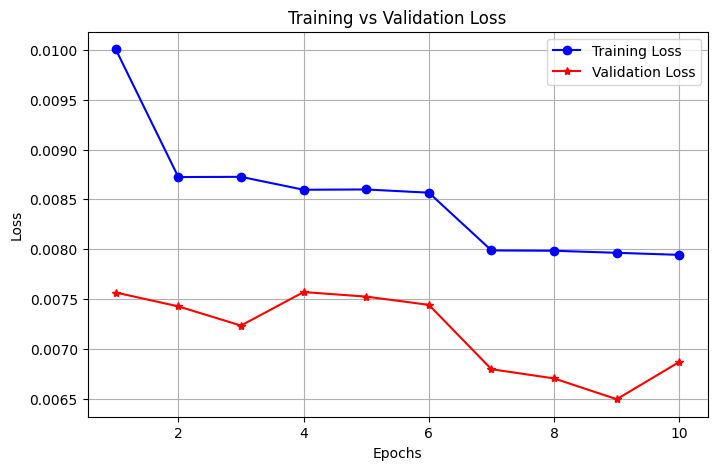

In [9]:
# Extract training and validation Loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' for blue dots
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')  # 'r*-' for red stars

# Label the axes and add title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

# Display the plot
plt.show()

### Training vs Validation Accuracy Graph

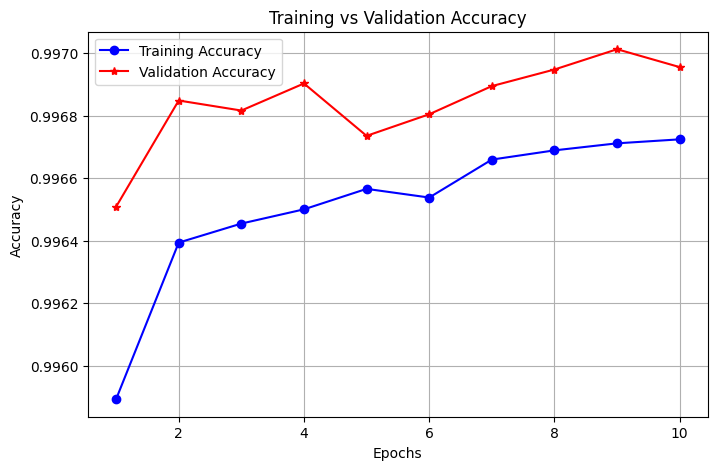

In [10]:
# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')

# Label the axes and add title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()

# Display the plot
plt.show()

### Confusion Matrix


Confusion Matrix:
 [[  34037    3570]
 [   3292 1573283]]

 



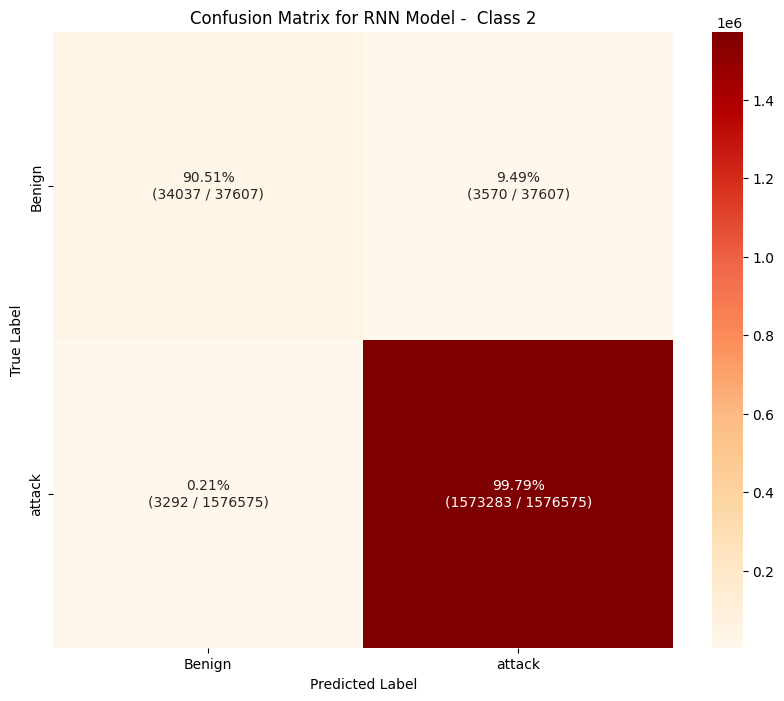

In [11]:
# Compute the confusion matrix using true and predicted class labels
cm = confusion_matrix(y_test_decoded, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\n \n")
# Normalize the confusion matrix by rows (i.e. true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Prepare the annotations with both counts and percentages
annot = np.empty_like(cm, dtype=object)
row_sums = cm.sum(axis=1)  # Sum of rows for percentage calculation

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        total = row_sums[i]
        percent = cm_normalized[i, j] * 100 if total != 0 else 0
        annot[i, j] = f"{percent:.2f}%\n({count} / {total})" if total != 0 else "—"

# Plot the confusion matrix as a heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=annot, fmt='s', cmap='OrRd', xticklabels=np.unique(y_test_decoded), yticklabels=np.unique(y_test_decoded))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RNN Model -  Class 2')

# Display the heatmap
plt.show()

### Test Accuracy and Classification Reprot

In [12]:
# Print the final accuracy on the test dataset
print("Accuracy on Test Data:", accuracy)

# Print a detailed classification report (precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred))

Accuracy on Test Data: 0.9957489304180074

Classification Report:
               precision    recall  f1-score   support

      Benign       0.91      0.91      0.91     37607
      attack       1.00      1.00      1.00   1576575

    accuracy                           1.00   1614182
   macro avg       0.95      0.95      0.95   1614182
weighted avg       1.00      1.00      1.00   1614182



## Evaluating and Saving the Model

*   Saving the evaluated model as.json file for future analysis



In [19]:
# Save the model
model_filename = 'RNN_2.h5'

full_save_path = os.path.join(save_path, model_filename)

joblib.dump(model, full_save_path)

['/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Result/RNN_2.h5']

In [31]:
# Evaluate the model and save detailed metrics for comparison
def evaluate_and_save_model(model, X_test, y_test_categorical, history, model_name, save_path):


    # Record the start time of evaluation
    start_eval = time.time()

    # Evaluate the model on test data (returns loss and accuracy)
    loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

    # Record the end time and calculate how long evaluation took
    end_eval = time.time()
    eval_time = end_eval - start_eval

    # Get predicted probabilities for each class
    y_pred_probs = model.predict(X_test)

    # Convert probabilities to predicted class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Convert one-hot encoded true labels to class labels
    y_true = np.argmax(y_test_categorical, axis=1)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Store all results in a dictionary
    results = {
        "model_name": model_name,
        "accuracy": float(accuracy),
        "loss": float(loss),
        "precision": float(precision),
        "recall": float(recall),
        "f1_score": float(f1),
        "evaluation_time_sec": float(eval_time),
        "confusion_matrix": conf_matrix.tolist(),
        "true_labels": y_true.tolist(),
        "predicted_labels": y_pred.tolist(),
        "predicted_probabilities": y_pred_probs.tolist(),
        "history": history.history  # Training history: loss and accuracy over epochs
    }

    # Save results dictionary as a JSON file
    with open(save_path, "w") as f:
        json.dump(results, f)

    # Print confirmation message
    print(f"Results saved successfully to {save_path}")

file_name = "results_rnn2.json"
save_path = os.path.join(save_path, file_name)

# Model evaluation and saving results
evaluate_and_save_model(
    model=model,
    X_test=X_test,
    y_test_categorical=y_test_categorical,
    history=history,
    model_name="RNN",
    save_path=save_path
)

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step
Results saved successfully to /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Result/results_rnn2.json
